In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Loading data file
df = pd.read_csv(r'9961_14084_bundle_archive\Train.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Missing values 
(df.isnull().sum()/df.shape[0]) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [5]:
 # Printing the top 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:

clm = df.columns
clm

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# printing correlation metrics for numerical columns
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [9]:
# filting the numeric features
numeric_features= [i for i in df.columns if df[i].dtype != 'O']
numeric_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [10]:
# filting the Categorical features
cat_features= [i for i in df.columns if df[i].dtype == 'O']
cat_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

# Univariant data analysis

C:\Users\e105301\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\e105301\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\e105301\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\e105301\Anaconda

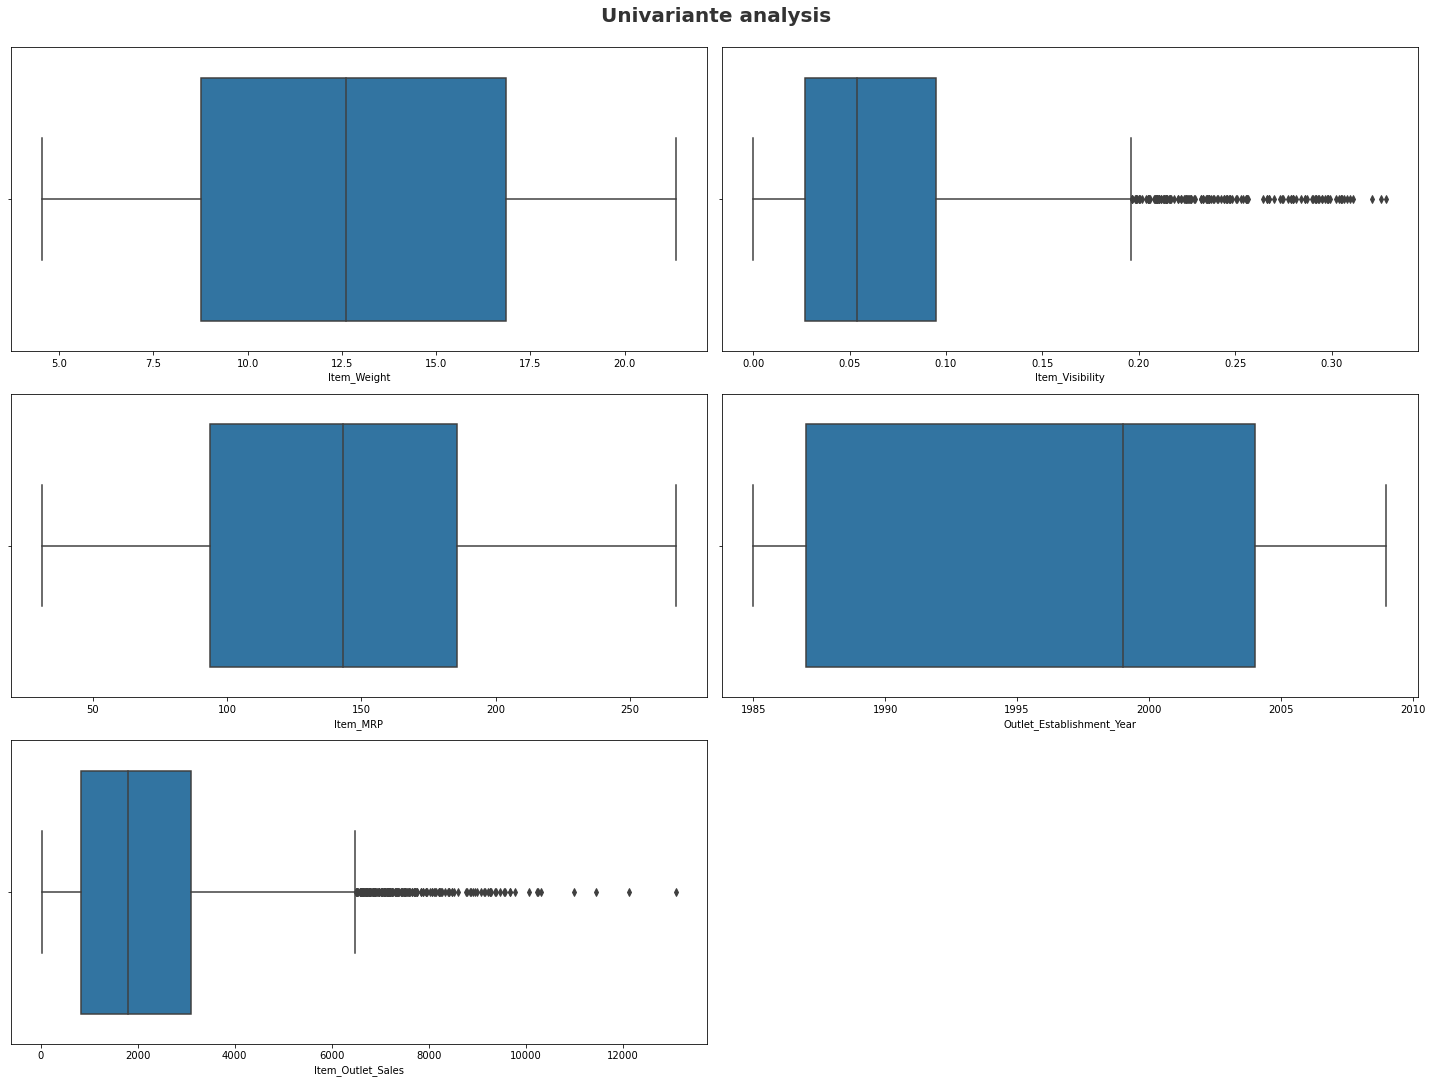

In [11]:
# Checking outlier with the help of boxplot
plt.figure(figsize=(20,15))
plt.suptitle('Univariante analysis', fontsize = 20 , fontweight = 'bold', alpha = 0.8, y = 1.)
for i in range(0, len(numeric_features)):
    plt.subplot(3,2 , i+1)
    sns.boxplot(df[numeric_features[i]])   
    plt.tight_layout()
plt.show()

In [12]:
# filtering data wt.r.t outlier 
df[df.Item_Outlet_Sales >=6500]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,NaN,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,NaN,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,NaN,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,NaN,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.35,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,NaN,Tier 2,Supermarket Type1,7588.1226


# Outlier Detection


C:\Users\e105301\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


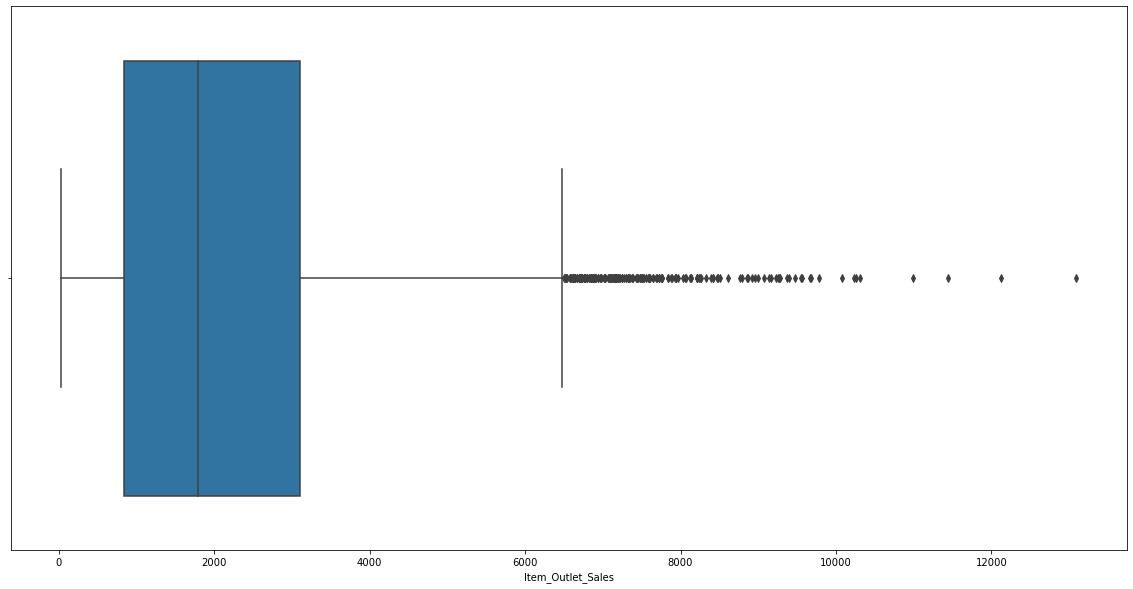

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(df.Item_Outlet_Sales)
plt.show()

In [14]:
# Detecting the outlier with IQR method

In [15]:
#Finding the IQR
percentile25 = df['Item_Outlet_Sales'].quantile(0.25)
percentile75 = df['Item_Outlet_Sales'].quantile(0.75)
#IQR
iqr = percentile75 - percentile25

#Finding the upper and lower limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('upper_limit', upper_limit)
print('lower_limit', lower_limit)

upper_limit 6501.8699
lower_limit -2566.3261


In [16]:
df['Item_Outlet_Sales'].quantile(0.95)

5522.811

C:\Users\e105301\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


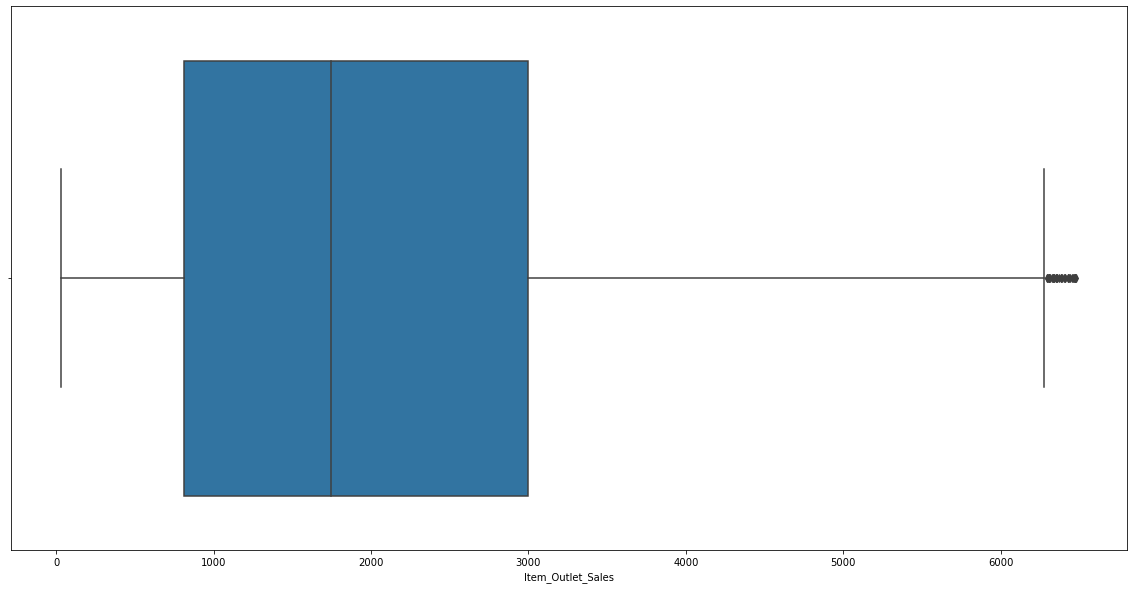

In [17]:
# plot with removed outliers
plt.figure(figsize=(20,10))
sns.boxplot(df.Item_Outlet_Sales[df.Item_Outlet_Sales < upper_limit])
plt.show()

In [18]:
# Checking ouliers with Z-score
mean = np.mean(df.Item_Outlet_Sales)
std = np.std(df.Item_Outlet_Sales)
threshold = 3
outlier = []
for i in df.Item_Outlet_Sales:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [7968.2944, 7370.406, 7452.9652, 7696.648, 9267.936, 7763.228, 9158.079, 8114.7704, 7443.644, 7488.9184, 7833.8028, 7759.899, 7370.406, 9133.4444, 9275.9256, 10236.675, 7472.2734, 8132.0812, 11445.102, 7646.0472, 7504.2318, 8239.9408, 9371.8008, 8851.1452, 7478.2656, 8604.7992, 7590.12, 8760.5964, 7931.6754, 7534.1928, 7843.124, 9467.676, 8912.3988, 7503.566, 8138.7392, 7334.4528, 7350.432, 8063.5038, 7580.133, 8958.339, 9779.9362, 9251.9568, 10993.6896, 7741.9224, 8262.578, 8413.0488, 10256.649, 9664.7528, 8508.924, 8028.8822, 7646.0472, 8388.4142, 12117.56, 7685.9952, 9562.2196, 7602.1044, 8868.456, 8479.6288, 7425.0016, 7317.142, 8474.3024, 7393.0432, 8217.3036, 7883.072, 9069.5276, 8789.8916, 10306.584, 9554.23, 8217.3036, 7719.2852, 8062.838, 8245.2672, 13086.9648, 10072.8882, 7939.665, 8323.8316, 7873.085, 8209.314, 7322.4684, 7717.9536, 7433.657, 7943.6598, 9678.0688, 7510.224, 8417.7094, 9227.988, 8994.958, 9390.4432, 7549.5062, 7588.1226]


In [19]:
len(outlier)
# we can see that with IQR method we could detect more outliers

90

In [20]:
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

print('upper_limit', upper_limit)
print('lower_limit', lower_limit)

upper_limit 7300.48741764482
lower_limit -2937.909590494747


C:\Users\e105301\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


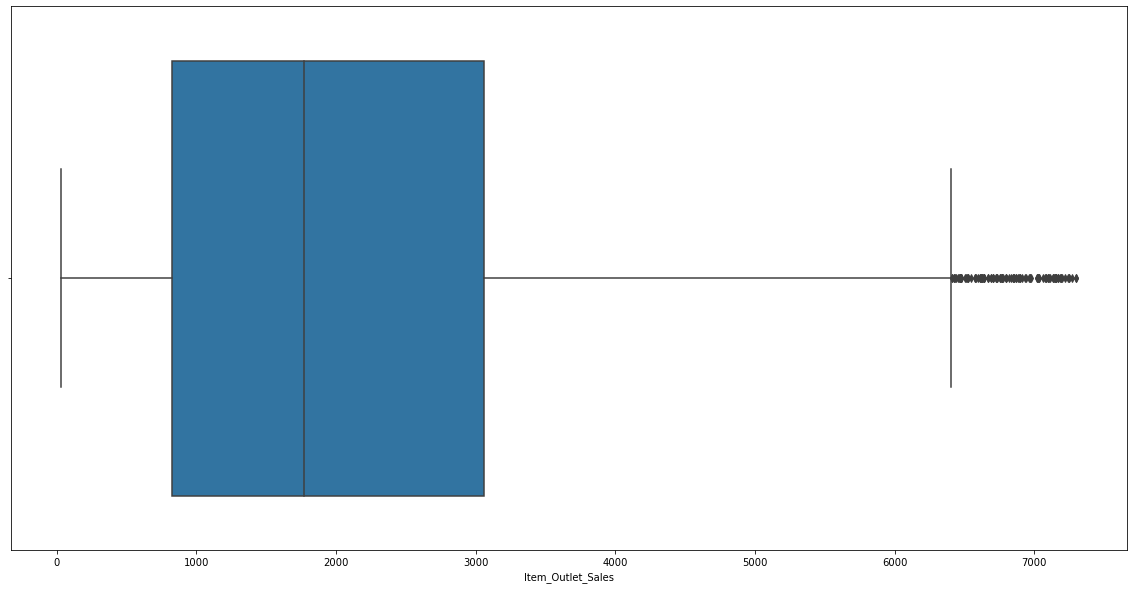

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(df.Item_Outlet_Sales[df.Item_Outlet_Sales < upper_limit])
plt.show()

In [22]:
# Filtering data below the 6500
df1 = df[df.Item_Outlet_Sales < 6500]
df1= df1.reset_index(drop= True)
#df1

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8337 entries, 0 to 8336
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   object 
 1   Item_Weight                6977 non-null   float64
 2   Item_Fat_Content           8337 non-null   object 
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   object 
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   object 
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                5955 non-null   object 
 9   Outlet_Location_Type       8337 non-null   object 
 10  Outlet_Type                8337 non-null   object 
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 781.7+ KB


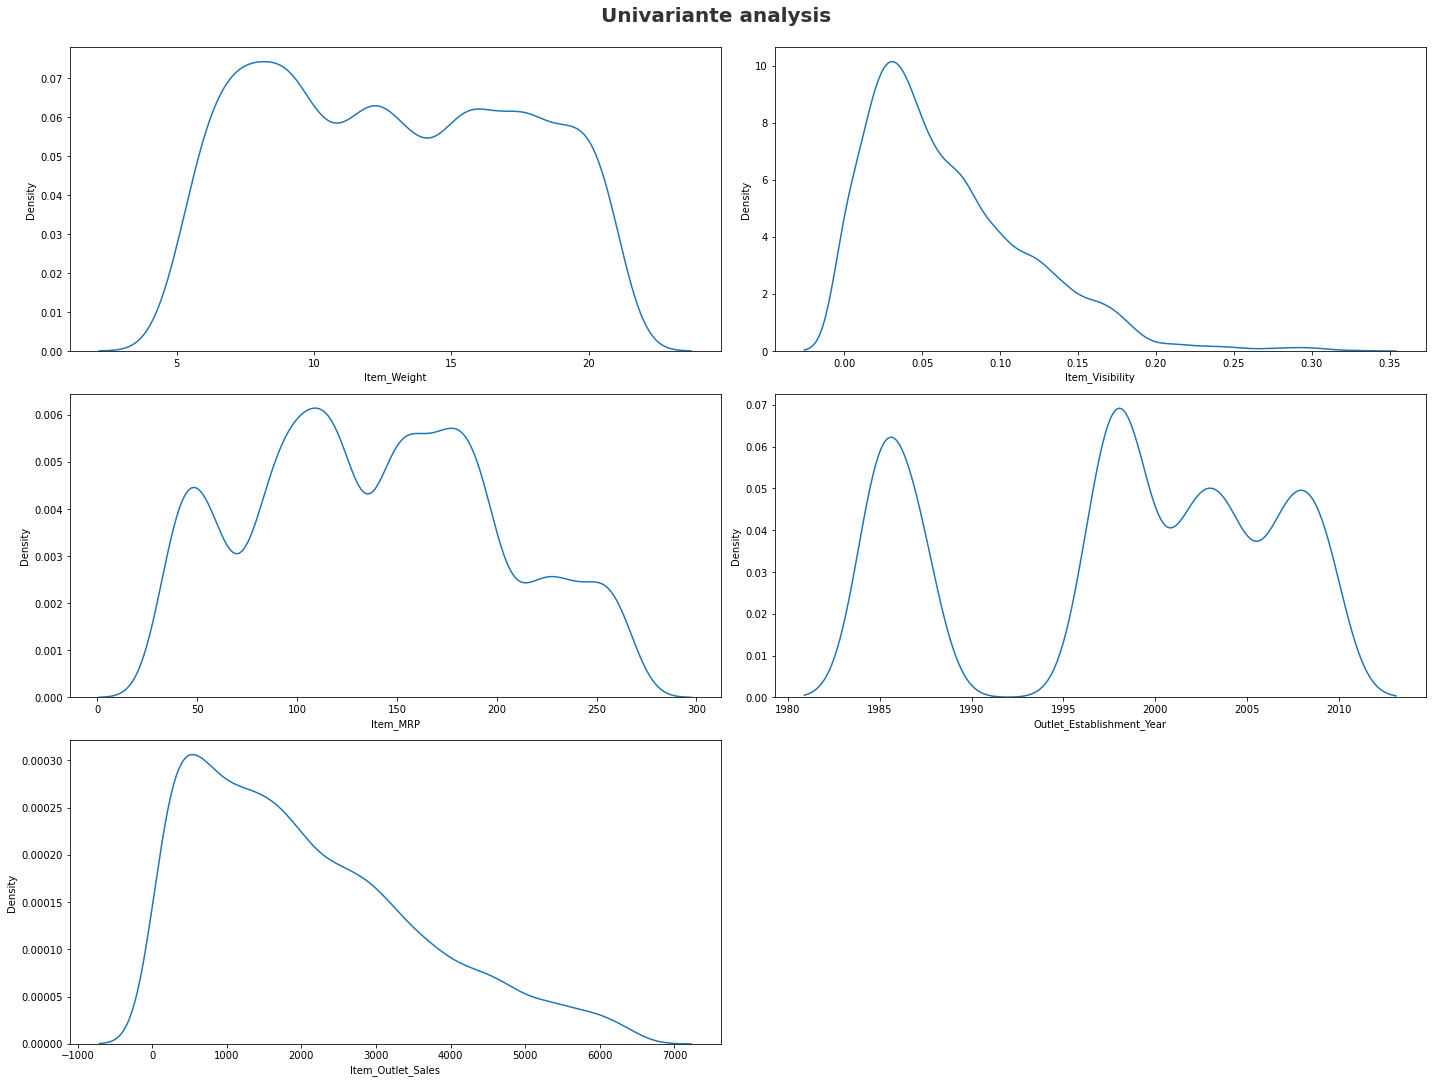

In [24]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariante analysis', fontsize = 20 , fontweight = 'bold', alpha = 0.8, y = 1.)
for i in range(0, len(numeric_features)):
    plt.subplot(3,2 , i+1)
    sns.kdeplot(df1[numeric_features[i]])
    
    plt.tight_layout()
plt.show()

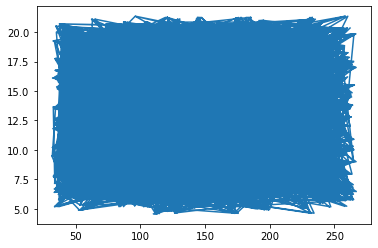

In [25]:
# Ploting relasationship between Item_Weight vs Item_MRP
# No relasation
plt.plot(df1.Item_MRP, df1.Item_Weight)

## Categorical data analysis

In [26]:
cat_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

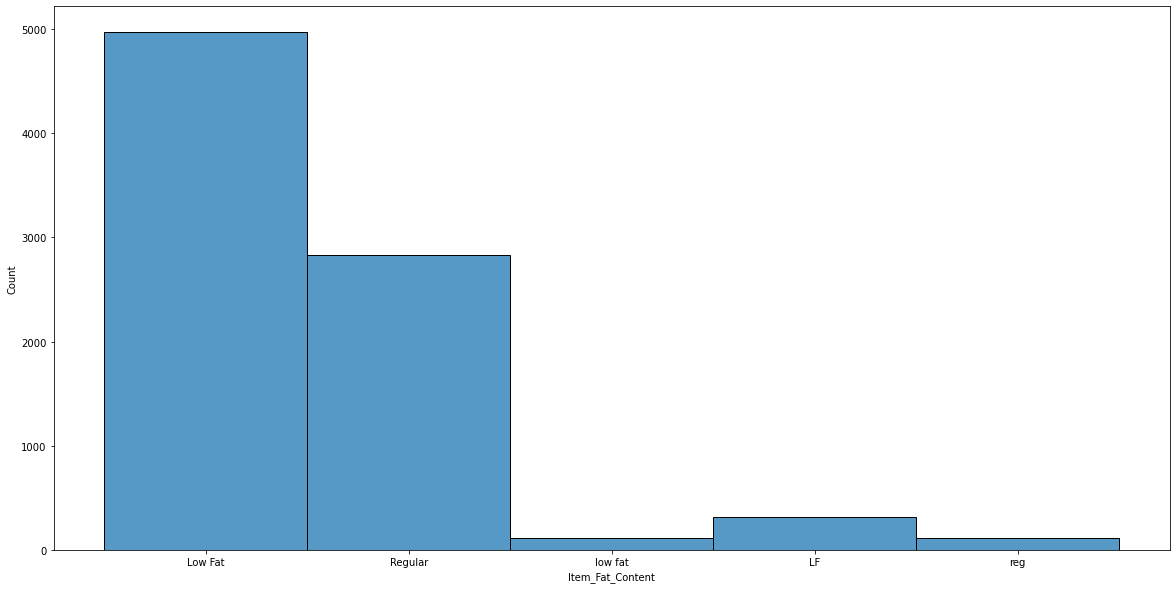

In [27]:
plt.figure(figsize=(20,10))
sns.histplot(df1[cat_features[1]])
plt.show()

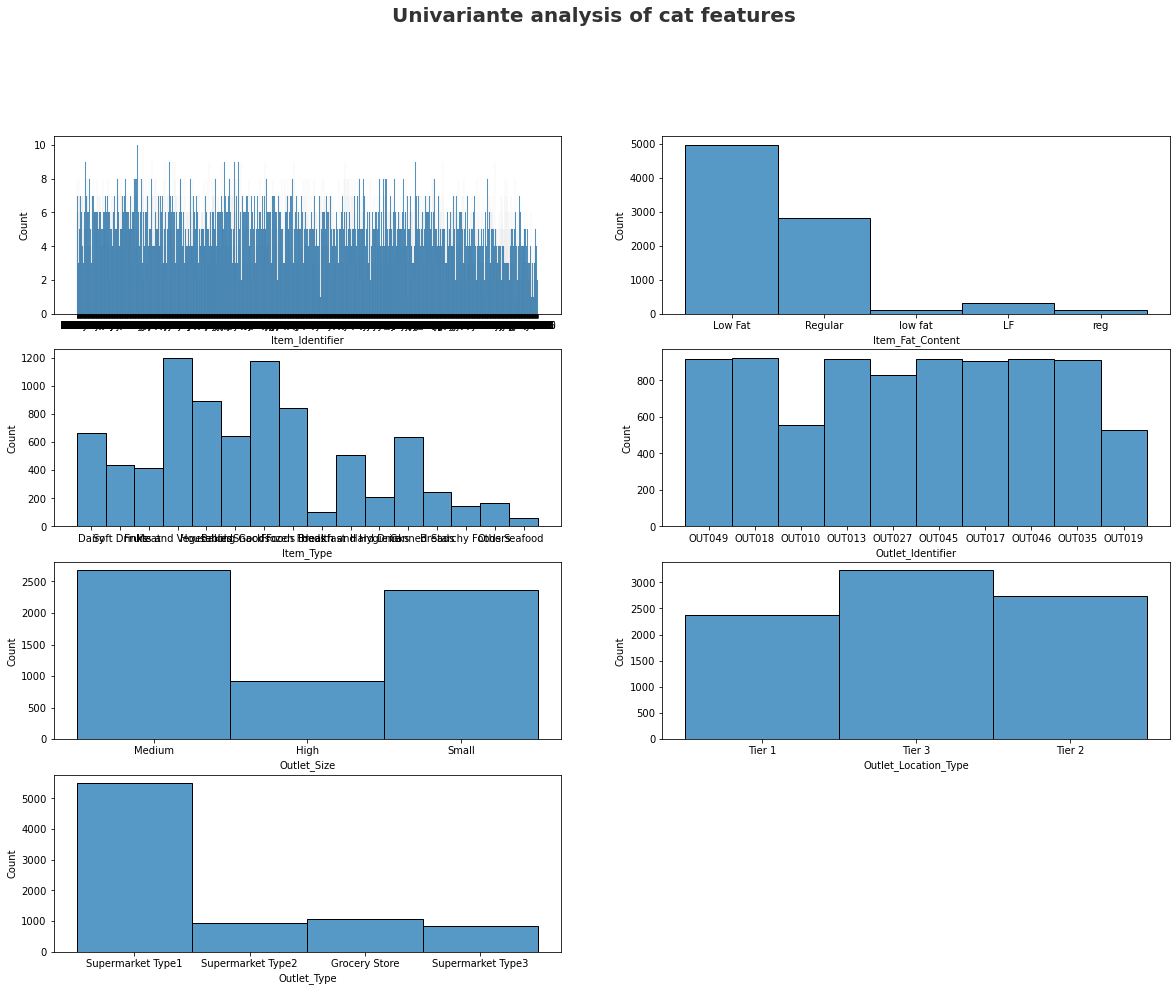

In [28]:
# Univariant Analysis for categorical feature
plt.figure(figsize=(20,15))
plt.suptitle('Univariante analysis of cat features', fontsize = 20 , fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(0, len(cat_features)):
    plt.subplot(4, 2 , i+1)
    sns.histplot(df1[cat_features[i]])
    

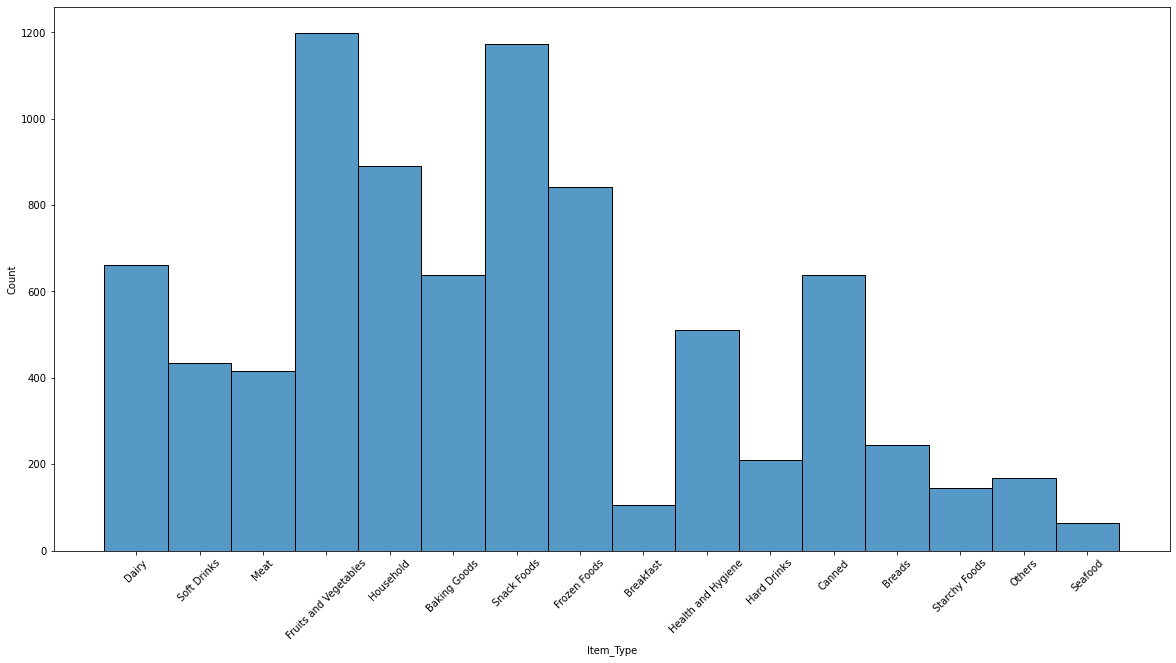

In [29]:
plt.figure(figsize=(20,10))
sns.histplot(df1[cat_features[2]])
plt.xticks(rotation=45)
plt.show()

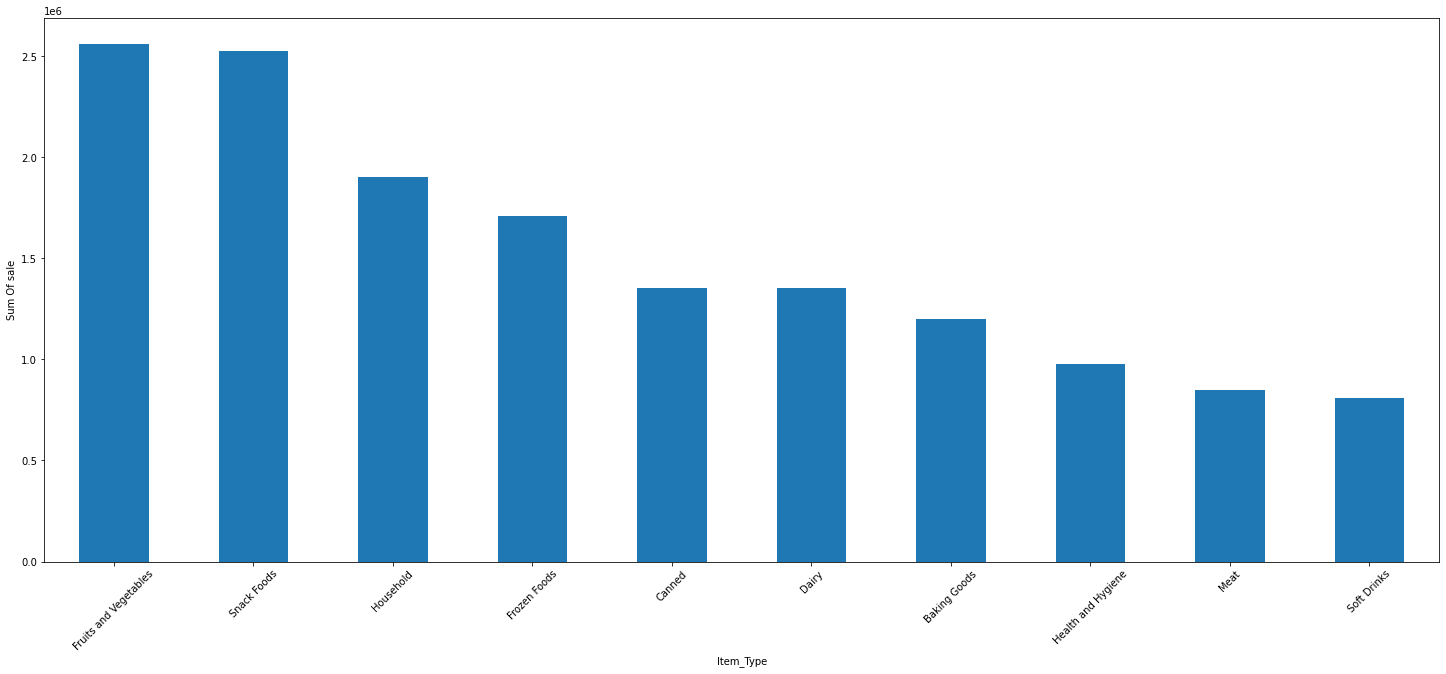

In [30]:
plt.figure(figsize=(25,10))
df1.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:10].plot(kind ='bar')
plt.ylabel('Sum Of sale')
plt.xticks(rotation=45)
plt.show()

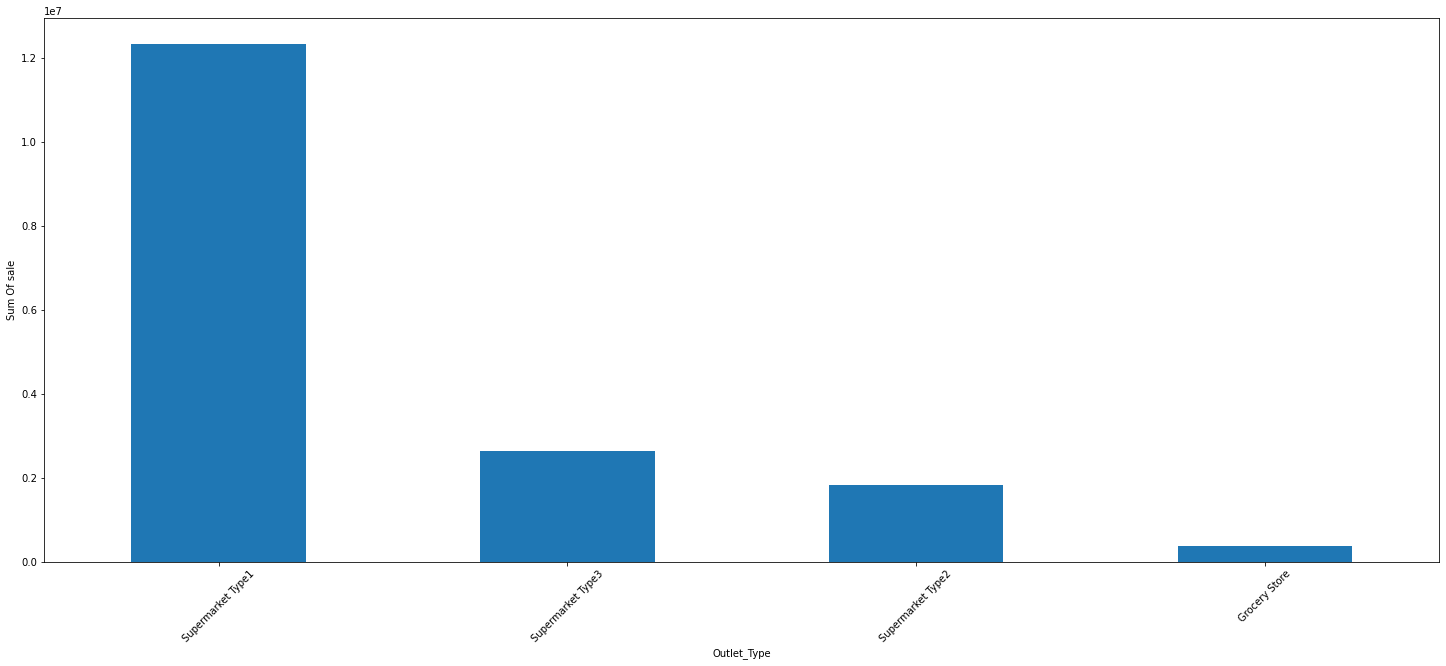

In [31]:
# sales based on outlet type
plt.figure(figsize=(25,10))
df1.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:10].plot(kind ='bar')
plt.ylabel('Sum Of sale')
plt.xticks(rotation=45)
plt.show()

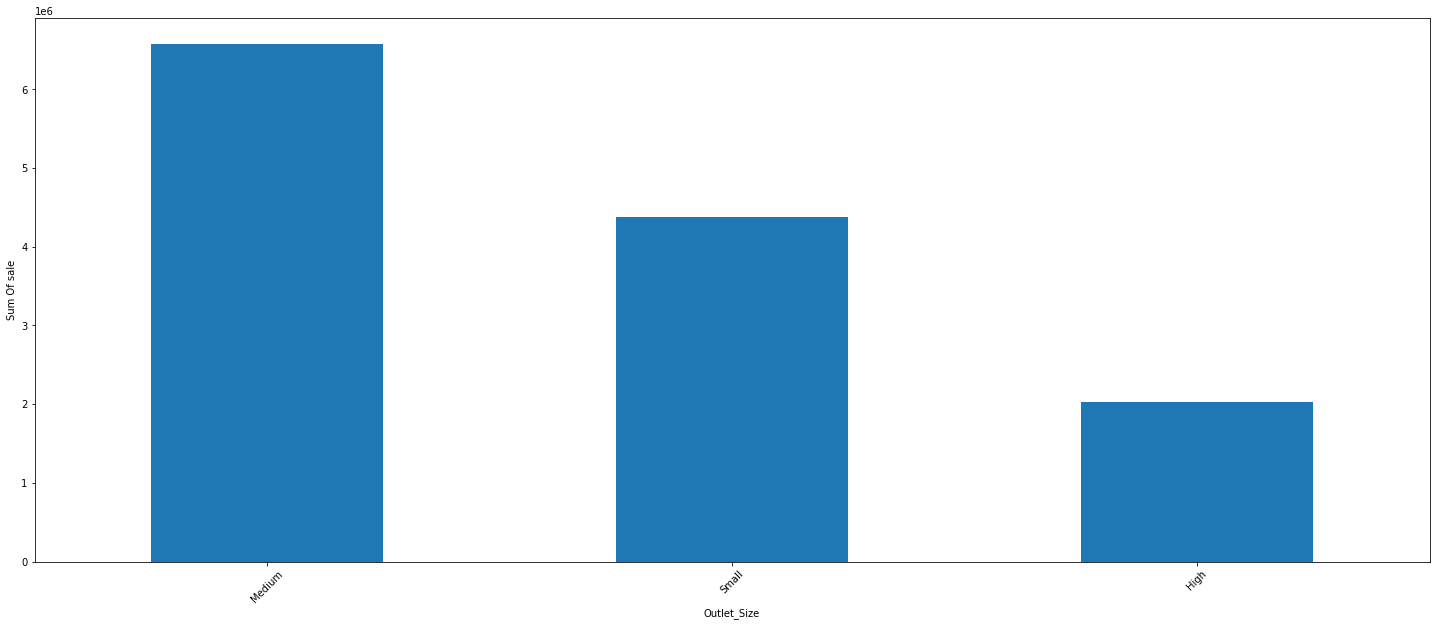

In [32]:
# sales based on outlet type
plt.figure(figsize=(25,10))
df1.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:10].plot(kind ='bar')
plt.ylabel('Sum Of sale')
plt.xticks(rotation=45)
plt.show()

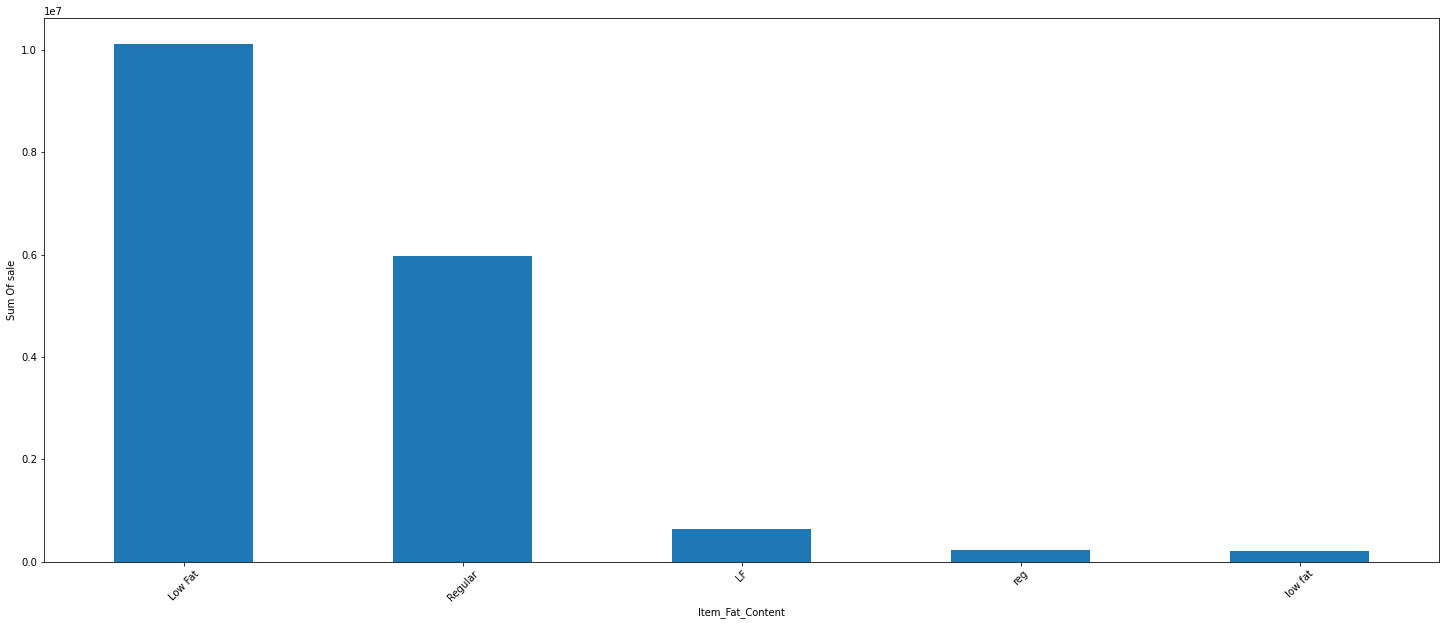

In [33]:
# sales based on Item_Fat_Content
plt.figure(figsize=(25,10))
df1.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:10].plot(kind ='bar')
plt.ylabel('Sum Of sale')
plt.xticks(rotation=45)
plt.show()

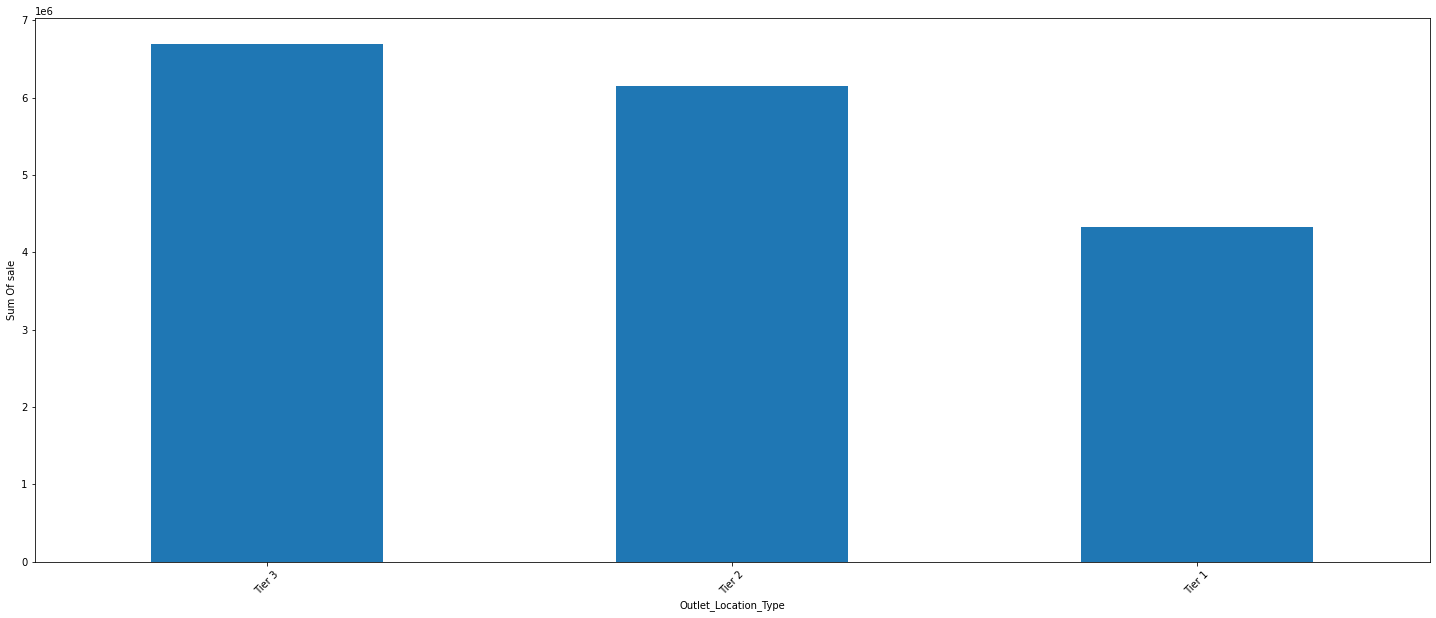

In [34]:
# sales based on Outlet_Location_Type
plt.figure(figsize=(25,10))
df1.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:10].plot(kind ='bar')
plt.ylabel('Sum Of sale')
plt.xticks(rotation=45)
plt.show()

In [35]:
cat_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

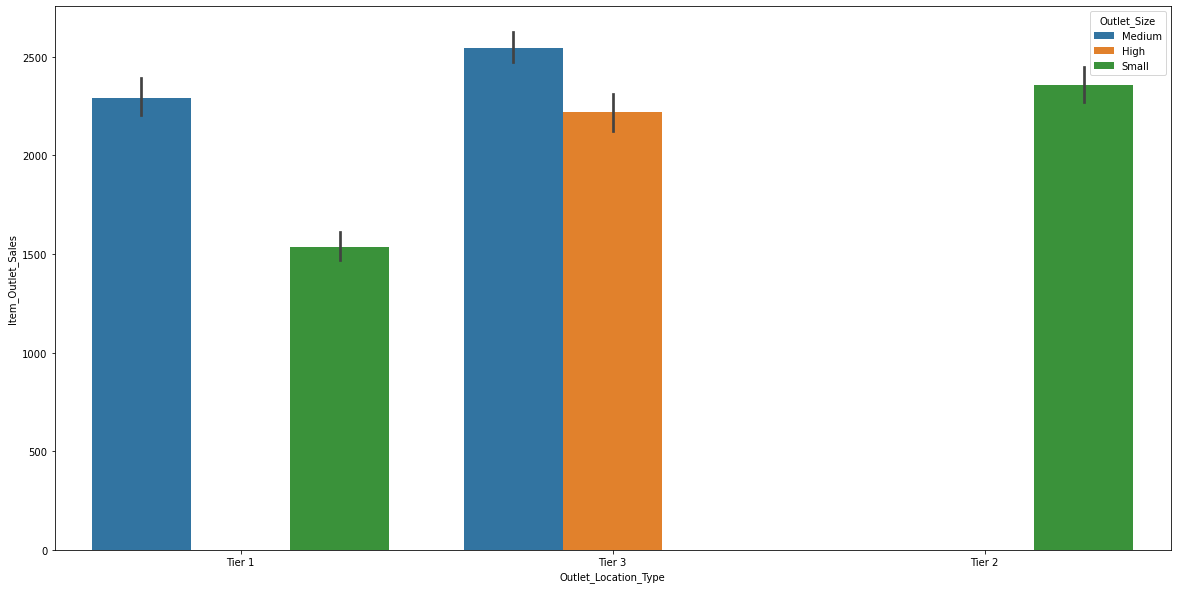

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x ='Outlet_Location_Type' ,y = 'Item_Outlet_Sales', data = df1, hue = 'Outlet_Size')

In [37]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [38]:
# Replacing the 'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'
df1['Item_Fat_Content']  = df1['Item_Fat_Content'].replace( {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

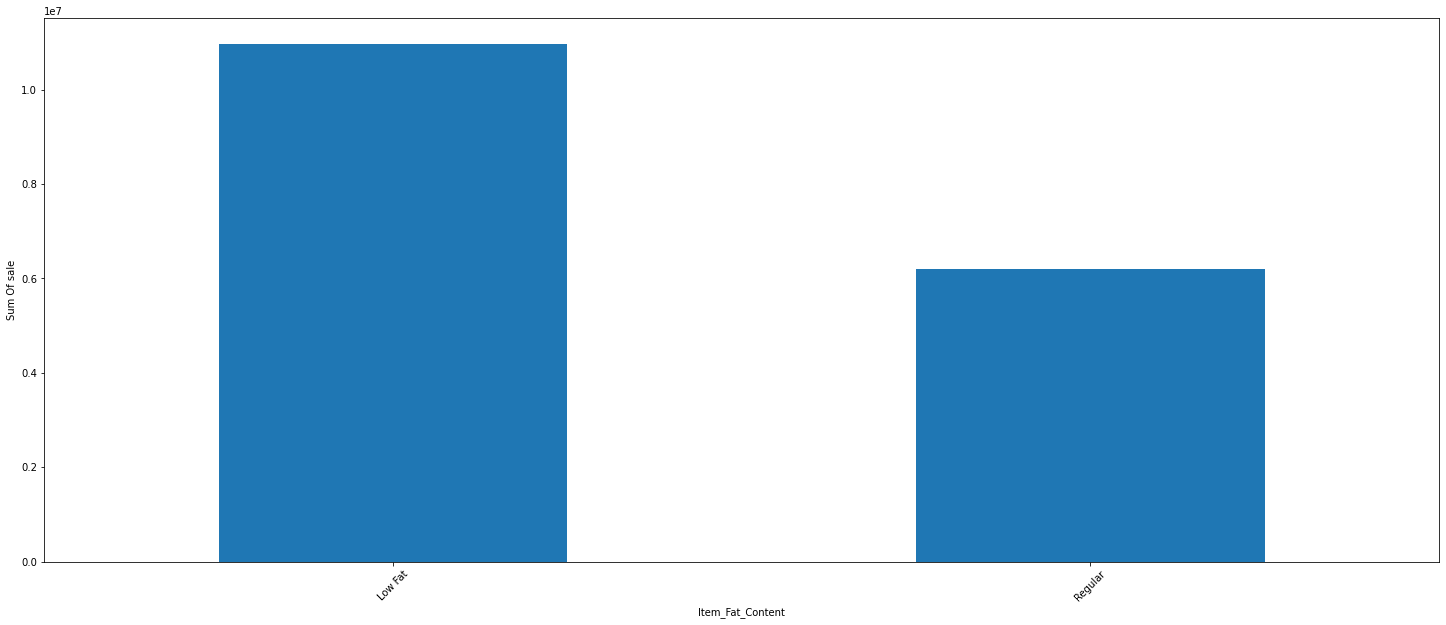

In [39]:
# sale based on Item_Fat_Content
plt.figure(figsize=(25,10))
df1.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:10].plot(kind ='bar')
plt.ylabel('Sum Of sale')
plt.xticks(rotation=45)
plt.show()

In [40]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [41]:
# Replacing the 'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'
df1['Outlet_Type']  = df1['Outlet_Type'].replace( 'Grocery Store' , 'Supermarket Type1')



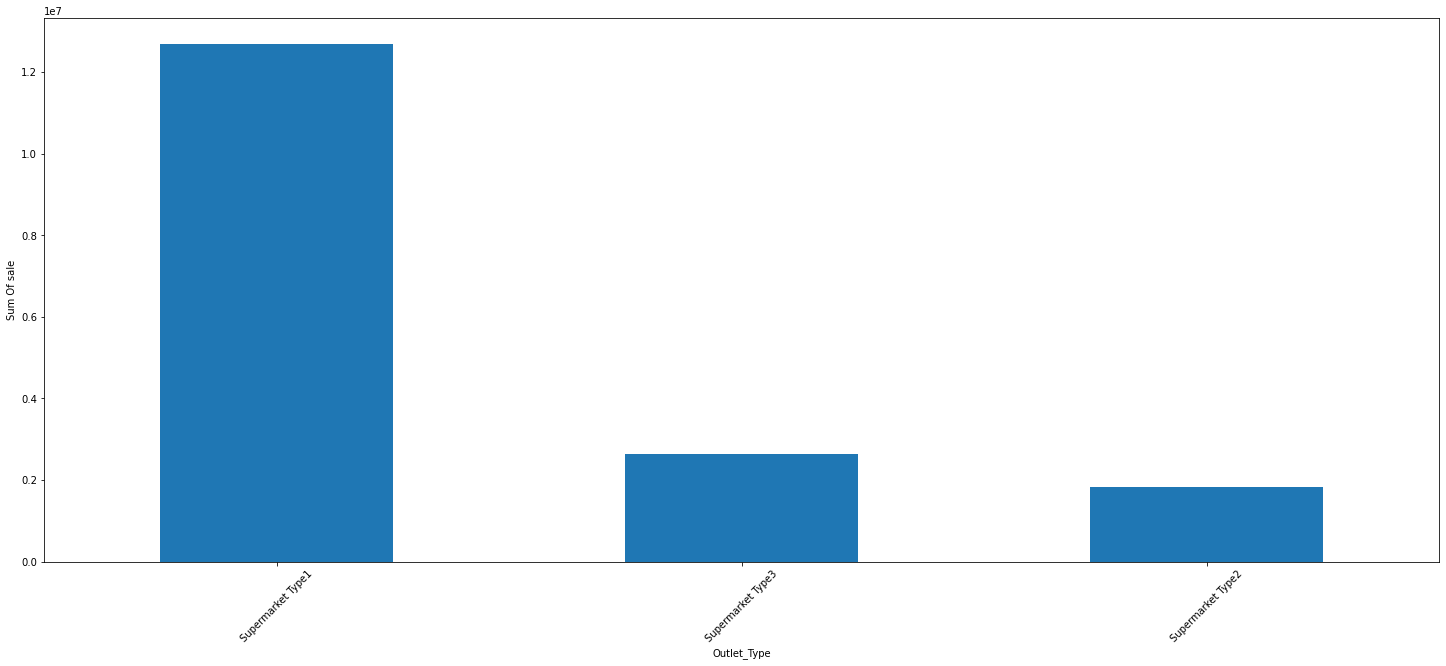

In [42]:
# sales based on outlet type
plt.figure(figsize=(25,10))
df1.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:10].plot(kind ='bar',)
plt.ylabel('Sum Of sale')
plt.xticks(rotation=45)
plt.show()

In [43]:
df1.shape

(8337, 12)

# Missing Values imputation &  Label encoding

In [44]:
# Removing some unwanted columns
df_copy = df1.drop(['Item_Identifier','Outlet_Identifier', 'Outlet_Establishment_Year' ], axis= 1)
df_copy

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Supermarket Type1,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8332,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8333,8.380,Regular,0.046982,Baking Goods,108.1570,NaN,Tier 2,Supermarket Type1,549.2850
8334,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8335,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [45]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Supermarket Type1,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
df_copy.shape

(8337, 9)

In [47]:
# filting the Categorical features

cat_features_copy = [i for i in df_copy.columns if df_copy[i].dtype == 'O']
cat_features_copy

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [48]:
df_copy.isna().sum()

Item_Weight             1360
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2382
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

## Label encoding

In [49]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [50]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [51]:
# mapping the ordinal data
Outlet_Size_mapper = {"Small":1, "Medium":2, "High":3}
df_copy["Outlet_Size"] = df_copy["Outlet_Size"].replace(Outlet_Size_mapper)

Outlet_Location_Type_mapper = {"Tier 1":1, "Tier 2":2, "Tier 3":3}
df_copy["Outlet_Location_Type"] = df_copy["Outlet_Location_Type"].replace(Outlet_Location_Type_mapper)

Outlet_Type_mapper = {"Supermarket Type1":1, "Supermarket Type2":2, "Supermarket Type3":3}
df_copy["Outlet_Type"] = df_copy["Outlet_Type"].replace(Outlet_Type_mapper)

In [52]:
df_copy

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,2.0,1,1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2.0,3,2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,2.0,1,1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,3,1,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,3.0,3,1,994.7052
...,...,...,...,...,...,...,...,...,...
8332,6.865,Low Fat,0.056783,Snack Foods,214.5218,3.0,3,1,2778.3834
8333,8.380,Regular,0.046982,Baking Goods,108.1570,NaN,2,1,549.2850
8334,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,1.0,2,1,1193.1136
8335,7.210,Regular,0.145221,Snack Foods,103.1332,2.0,3,2,1845.5976


In [53]:
# one hot encoding for the nominal data
One_Hot_Encoder =  OneHotEncoder(drop='first', sparse= False)
# or using dummy method

In [54]:
clms = ['Item_Fat_Content','Item_Type']
encode_data = One_Hot_Encoder.fit_transform(df_copy[clms])

C:\Users\e105301\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
df_encode_data =pd.DataFrame(encode_data, columns= One_Hot_Encoder.get_feature_names_out(clms))
df_encode_data

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
One_Hot_Encoder.get_feature_names_out()


array(['Item_Fat_Content_Regular', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'], dtype=object)

In [57]:
df_copy.shape,  df_encode_data.shape

((8337, 9), (8337, 16))

In [58]:
# Concating the df_copy and one hot enconded data frame
df_filtered = pd.concat([df_copy,df_encode_data],axis=1)#, ignore_index = True)
df_filtered.shape

(8337, 25)

In [59]:
# droped the labeled columns
df_filtered = df_filtered.drop(['Item_Fat_Content','Item_Type','Item_Visibility'],axis= 1)
df_filtered

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,249.8092,2.0,1,1,3735.1380,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.920,48.2692,2.0,3,2,443.4228,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,141.6180,2.0,1,1,2097.2700,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.200,182.0950,NaN,3,1,732.3800,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.930,53.8614,3.0,3,1,994.7052,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,6.865,214.5218,3.0,3,1,2778.3834,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8333,8.380,108.1570,NaN,2,1,549.2850,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8334,10.600,85.1224,1.0,2,1,1193.1136,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8335,7.210,103.1332,2.0,3,2,1845.5976,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


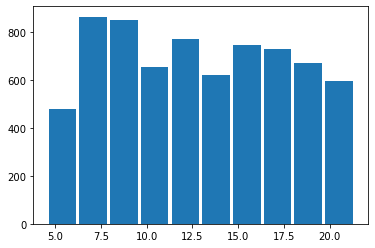

In [60]:
plt.hist(df_filtered.Item_Weight, bins=10, rwidth=0.9)
plt.show()

## Missing values imputation

In [61]:
#Imputing the missing values for numerical data with SimpleImputer
# mean and mediun are same 
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy = 'median')
df_filtered['Item_Weight'] = num_imputer.fit_transform(df_filtered['Item_Weight'].values.reshape(-1, 1))
df_filtered



,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,249.8092,2.0,1,1,3735.1380,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.920,48.2692,2.0,3,2,443.4228,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,141.6180,2.0,1,1,2097.2700,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.200,182.0950,NaN,3,1,732.3800,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.930,53.8614,3.0,3,1,994.7052,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,6.865,214.5218,3.0,3,1,2778.3834,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8333,8.380,108.1570,NaN,2,1,549.2850,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8334,10.600,85.1224,1.0,2,1,1193.1136,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8335,7.210,103.1332,2.0,3,2,1845.5976,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
# Used the KNNIMPUTER for  Outlet_Size >>> i.e. categorical feature
imputer = KNNImputer(n_neighbors= 2)

In [63]:
imputer.fit(df_filtered['Outlet_Size'].values.reshape(-1, 1))

KNNImputer(n_neighbors=2)

In [64]:
imp = np.round(imputer.transform(df_filtered['Outlet_Size'].values.reshape(-1, 1)))

In [65]:
#df_filtered = df_copy.dropna(how= 'any', axis=0)
df_filtered['Outlet_Size'] = imp

C:\Users\e105301\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

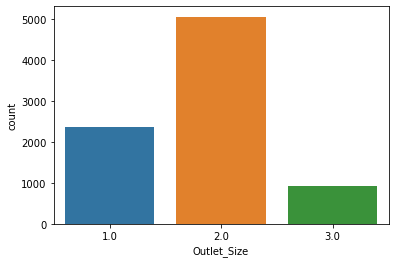

In [66]:
sns.countplot(df_filtered['Outlet_Size'])

C:\Users\e105301\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


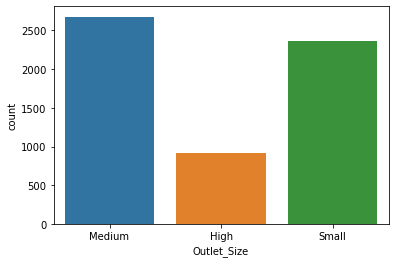

In [67]:
#"Small":1, "Medium":2, "High":3
sns.countplot(df1['Outlet_Size'])
plt.show()

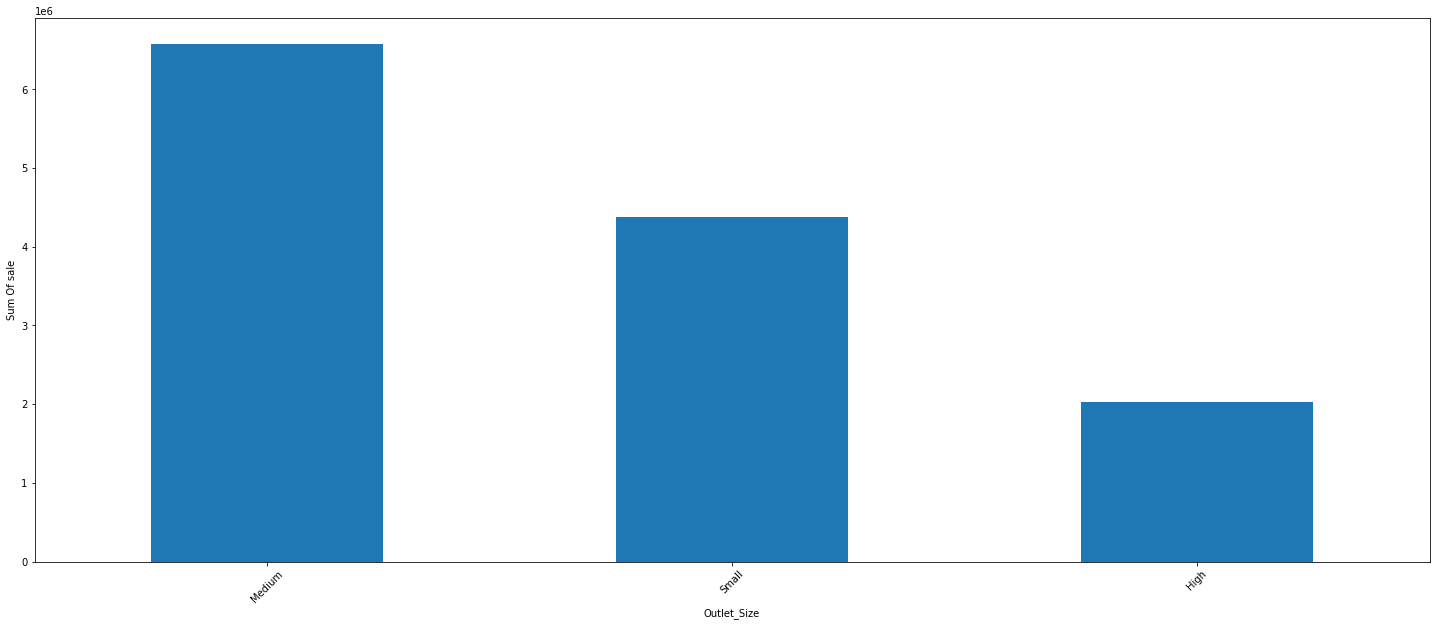

In [68]:
# sales based on outlet type
#"Small":1, "Medium":2, "High":3
            
plt.figure(figsize=(25,10))
df1.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values(ascending = False)[:10].plot(kind ='bar')
plt.ylabel('Sum Of sale')
plt.xticks(rotation=45)
plt.show()

In [69]:
df_filtered

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,249.8092,2.0,1,1,3735.1380,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.920,48.2692,2.0,3,2,443.4228,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,141.6180,2.0,1,1,2097.2700,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.200,182.0950,2.0,3,1,732.3800,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.930,53.8614,3.0,3,1,994.7052,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,6.865,214.5218,3.0,3,1,2778.3834,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8333,8.380,108.1570,2.0,2,1,549.2850,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8334,10.600,85.1224,1.0,2,1,1193.1136,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8335,7.210,103.1332,2.0,3,2,1845.5976,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
df_filtered.isna().sum()

Item_Weight                        0
Item_MRP                           0
Outlet_Size                        0
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
Item_Fat_Content_Regular           0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
dtype: int64

In [71]:
# checking for categorical values
X_features = df_filtered.drop(['Item_Outlet_Sales'], axis=1)
y_feature = df_filtered[['Item_Outlet_Sales']]
X_features.shape

(8337, 21)

# Feature Selection

In [72]:
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LinearRegression ,LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score


In [73]:
# Data scaling using Min Max scaler
scaler = MinMaxScaler()
X_features_scaled = scaler.fit_transform(X_features)

In [74]:

# Spliting data 
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_feature.values, test_size= 0.85, random_state= 42)

In [75]:
y_train

array([[1635.8706],
       [2404.8696],
       [1635.8706],
       ...,
       [3238.4512],
       [2942.836 ],
       [3896.2616]])

In [76]:
# Checking Feature selection with Linear Regression
lr = LinearRegression()
lr_model = RFE(lr, n_features_to_select= 10)
lr_model.fit(X_train,y_train)

lr_pred = lr_model.predict(X_test)
print('Mean Sq Error : ', mean_squared_error(y_test, lr_pred))
print(lr_model.support_)
print('Rank:', lr_model.ranking_)

Mean Sq Error :  1406670.0953707593
[False  True  True  True  True False  True  True False  True False False
 False False False False  True  True  True False False]
Rank: [11  1  1  1  1 10  1  1  4  1  8 12  3  5  9  2  1  1  1  7  6]


In [77]:
X_features.columns

Index(['Item_Weight', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Fat_Content_Regular', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods'],
      dtype='object')

In [78]:
# RFR
RFR = RandomForestRegressor(n_estimators= 100)
RFR_model = RFE(RFR, n_features_to_select= 10)
RFR_model.fit(X_train,y_train.ravel())
RFR_pred = RFR_model.predict(X_test)
print('Mean Sq Error : ', mean_squared_error(y_test, RFR_pred))
print(RFR_model.support_)
print('Rank:', RFR_model.ranking_)

Mean Sq Error :  1169417.427882509
[ True  True  True  True  True  True False False  True  True False  True
 False False False False False False  True False False]
Rank: [ 1  1  1  1  1  1 11 10  1  1  3  1  8  5  2  4 12  9  1  6  7]


In [79]:
# L1 regularization
lasso = LassoCV()
lasso.fit(X_train,y_train.ravel())
print(lasso.coef_ != 0)
lasso_pred = lasso.predict(X_test)
print('Mean Sq Error : ', mean_squared_error(y_test, lasso_pred))


[False  True  True  True  True False False False  True  True False False
 False  True False  True  True False  True False False]
Mean Sq Error :  1397545.8099680636


In [80]:
X_features.columns

Index(['Item_Weight', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Fat_Content_Regular', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods'],
      dtype='object')

<AxesSubplot:>

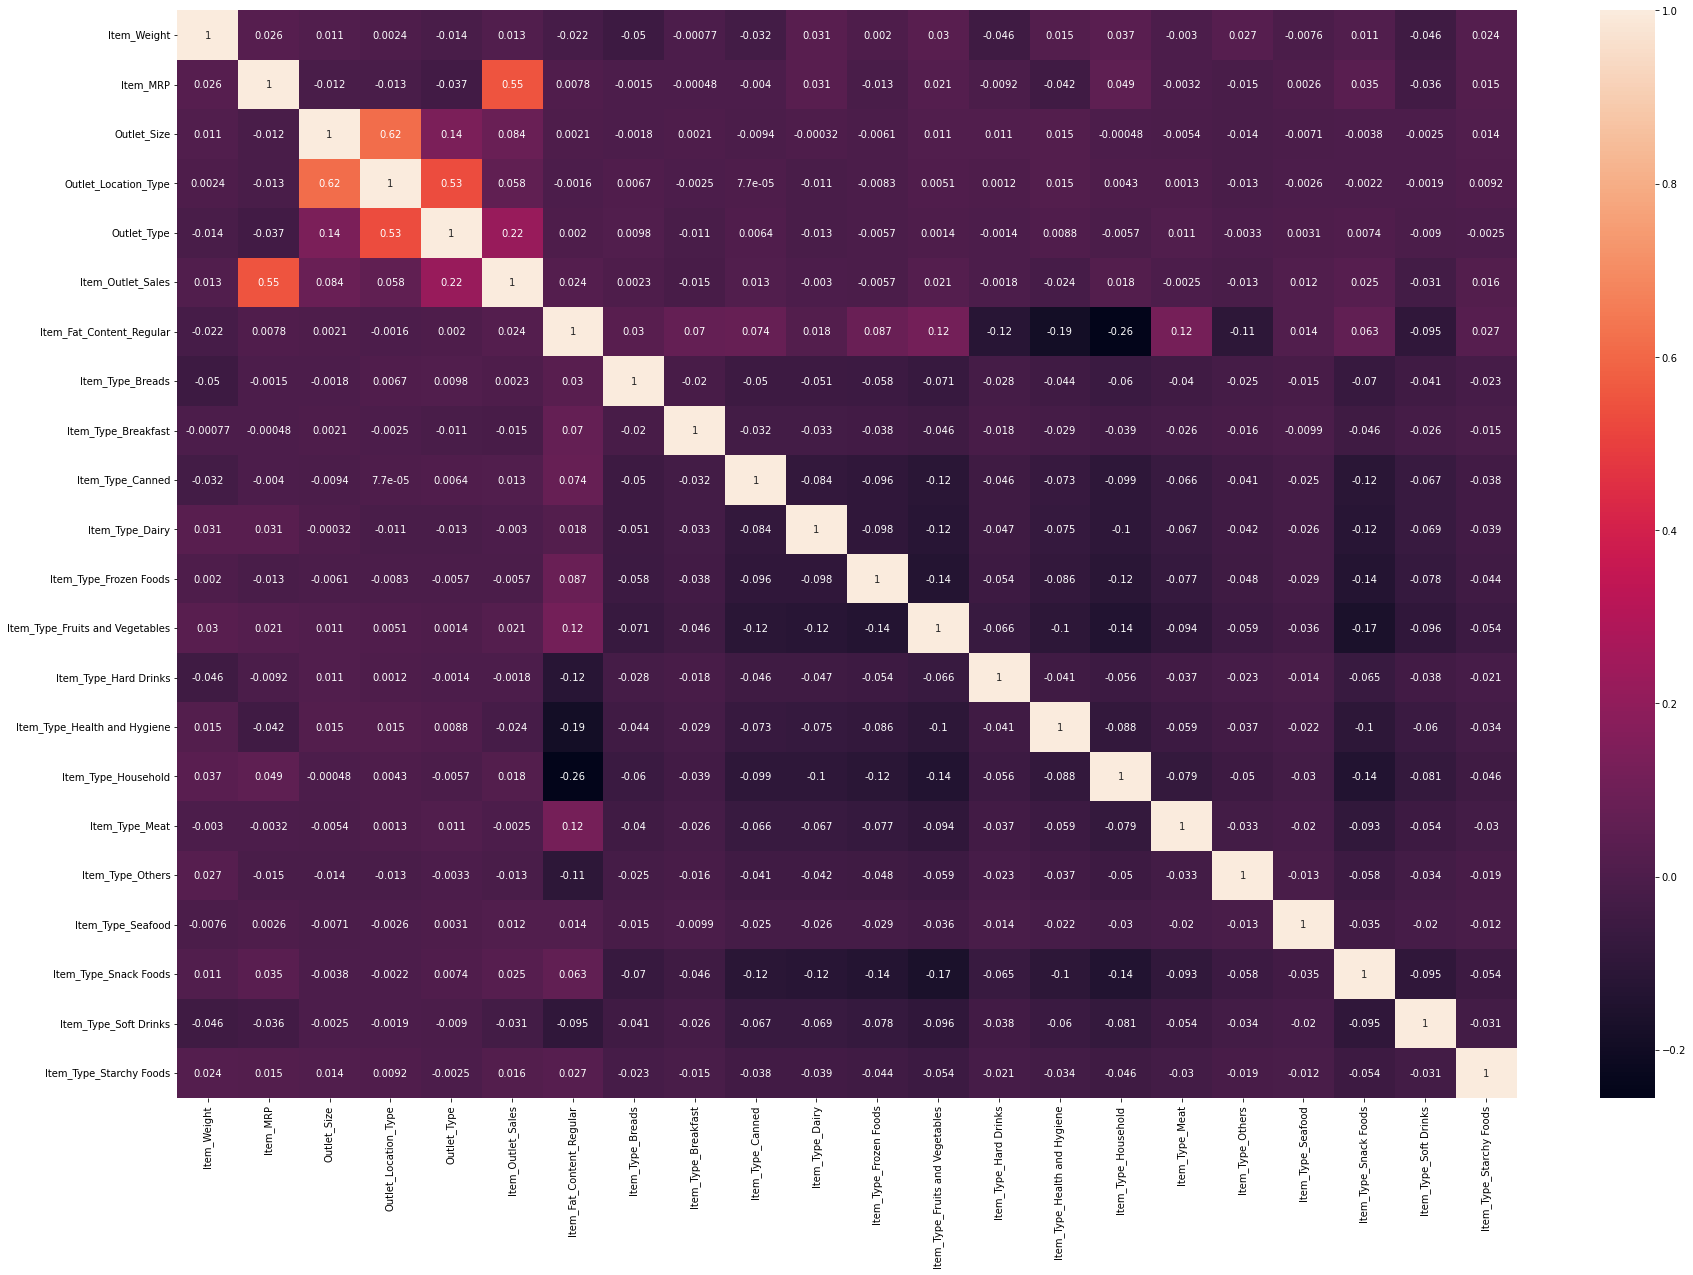

In [81]:
# Ploting correlation metrics
plt.figure(figsize=(30,20))
sns.heatmap(df_filtered.corr(), annot= True)

In [82]:
# Select from model
sfm = SelectFromModel(lasso)
sfm.fit(X_train, y_train.ravel())
sfm.get_support()

array([False,  True,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True, False,  True,  True, False,
        True, False, False])

# Model Building

# LR

In [83]:
# LR model with all data
lr = LinearRegression()
lr.fit(X_train,y_train.ravel())
lr_pred = lr.predict(X_test)
# Testing data

print('MSE for testing data:', mean_squared_error(y_test, lr_pred))
print('Model score(r2_score) with test data :', r2_score(y_test, lr_pred))
print('Model score(r2_score) with train data :', lr.score(X_train,y_train.ravel()))

MSE for testing data: 1411258.2086357789
Model score(r2_score) with test data : 0.37825240521771153
Model score(r2_score) with train data : 0.4070269787657327


# Random Forest Regressor


In [84]:
RFR_model = RandomForestRegressor(n_estimators= 100)
RFR_model.fit(X_train,y_train.ravel())

RR_pred = RFR_model.predict(X_test)
print('MSE for testing data: ', mean_squared_error(y_test, RFR_pred))

print('Model score(r2_score) with test data :' ,r2_score(y_test, RFR_pred.reshape(-1,1)))
print('Model score(r2_score) with train data :', r2_score(y_train, RFR_model.predict(X_train)))

MSE for testing data:  1169417.427882509
Model score(r2_score) with test data : 0.4847984099342889
Model score(r2_score) with train data : 0.9322624315014985


# XGBRegressor

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [86]:
#create an xgboost regression model
XGBR = XGBRegressor()
# fit model
XGBR.fit( X_train, y_train)


XGBR_pred = XGBR.predict(X_test)

print('MSE for testing data: ', mean_squared_error(y_test, XGBR_pred))
print('Model score(r2_score) with test data :' ,r2_score(y_test,XGBR_pred))
print('Model score(r2_score) with train data :', r2_score(y_train, XGBR.predict(X_train)))

MSE for testing data:  1290430.4149815384
Model score(r2_score) with test data : 0.4314846129226326
Model score(r2_score) with train data : 0.97136022229761


In [91]:
# model building with relevent features only as per the feature selection tech
print(lasso.coef_ != 0)

[False  True  True  True  True False False False  True  True False False
 False  True False  True  True False  True False False]


In [159]:
### Case 1 with below features ###
#'Item_Weight','Item_MRP', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Fat_Content_Regular'
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,0:6], y_feature.values, test_size= 0.85, random_state= 40)

# As lR not performing the well, skipping for next steps

In [160]:
X_train

array([[0.65168205, 0.08352858, 0.5       , 1.        , 0.5       ,
        1.        ],
       [0.11134266, 0.42857931, 0.        , 0.5       , 0.        ,
        0.        ],
       [0.07889253, 0.29927623, 0.        , 0.5       , 0.        ,
        1.        ],
       ...,
       [0.88984817, 0.85402023, 0.        , 0.5       , 0.        ,
        1.        ],
       [0.28252456, 0.90785931, 0.5       , 0.        , 0.        ,
        0.        ],
       [0.06311402, 0.38490499, 0.        , 0.        , 0.        ,
        0.        ]])

In [145]:
RFR_model = RandomForestRegressor(n_estimators= 100)
RFR_model.fit(X_train,y_train)

RR_pred = RFR_model.predict(X_test)
print('MSE for testing data: ', mean_squared_error(y_test, RFR_pred))

print('Model score(r2_score) with test data :' ,r2_score(y_test, RFR_pred))
print('Model score(r2_score) with train data :', r2_score(y_train, RFR_model.predict(X_train)))

C:\Users\e105301\AppData\Local\Temp/ipykernel_28192/2995346448.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR_model.fit(X_train,y_train)


MSE for testing data:  3624345.588744554
Model score(r2_score) with test data : -0.6041937201698186
Model score(r2_score) with train data : 0.9270626790660841


In [161]:
#create an xgboost regression model
XGBR_save = XGBRegressor()
# fit model
XGBR_save.fit( X_train, y_train)


XGBR_pred = XGBR_save.predict(X_test)

print('MSE for testing data: ', mean_squared_error(y_test, XGBR_pred))
print('Model score(r2_score) with test data :' ,r2_score(y_test,XGBR_pred))
print('Model score(r2_score) with train data :', r2_score(y_train, XGBR_save.predict(X_train)))

MSE for testing data:  1282024.4460679183
Model score(r2_score) with test data : 0.432555335817537
Model score(r2_score) with train data : 0.9608154776697755


In [147]:
### Case 2 with expect 'Item_Weight' ###
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,1:], y_feature.values, test_size= 0.85, random_state= 40)


In [148]:
RFR_model = RandomForestRegressor(n_estimators= 100)
RFR_model.fit(X_train,y_train)

RR_pred = RFR_model.predict(X_test)
print('MSE for testing data: ', mean_squared_error(y_test, RFR_pred))

print('Model score(r2_score) with test data :' ,r2_score(y_test, RFR_pred))
print('Model score(r2_score) with train data :', r2_score(y_train, RFR_model.predict(X_train)))

C:\Users\e105301\AppData\Local\Temp/ipykernel_28192/2995346448.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR_model.fit(X_train,y_train)


MSE for testing data:  3624345.588744554
Model score(r2_score) with test data : -0.6041937201698186
Model score(r2_score) with train data : 0.9200893292772121


In [149]:
#create an xgboost regression model
XGBR = XGBRegressor()
# fit model
XGBR.fit( X_train, y_train)


XGBR_pred = XGBR.predict(X_test)

print('MSE for testing data: ', mean_squared_error(y_test, XGBR_pred))
print('Model score(r2_score) with test data :' ,r2_score(y_test,XGBR_pred))
print('Model score(r2_score) with train data :', r2_score(y_train, XGBR.predict(X_train)))

MSE for testing data:  1483324.0652970052
Model score(r2_score) with test data : 0.343456882832612
Model score(r2_score) with train data : 0.9493565164023235


In [150]:
### Case 3 with ###
# 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Fat_Content_Regular'
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,1:6], y_feature.values, test_size= 0.85, random_state= 40)


In [151]:
RFR_model = RandomForestRegressor(n_estimators= 100)
RFR_model.fit(X_train,y_train.ravel())

RR_pred = RFR_model.predict(X_test)
print('MSE for testing data: ', mean_squared_error(y_test, RFR_pred))

print('Model score(r2_score) with test data :' ,r2_score(y_test, RFR_pred.reshape(-1,1)))
print('Model score(r2_score) with train data :', r2_score(y_train, RFR_model.predict(X_train)))

MSE for testing data:  3624345.588744554
Model score(r2_score) with test data : -0.6041937201698186
Model score(r2_score) with train data : 0.9149272761393361


In [152]:
#create an xgboost regression model
XGBR = XGBRegressor()
# fit model
XGBR.fit( X_train, y_train)


XGBR_pred = XGBR.predict(X_test)

print('MSE for testing data: ', mean_squared_error(y_test, XGBR_pred))
print('Model score(r2_score) with test data :' ,r2_score(y_test,XGBR_pred))
print('Model score(r2_score) with train data :', r2_score(y_train, XGBR.predict(X_train)))

MSE for testing data:  1527489.3773151687
Model score(r2_score) with test data : 0.3239086045423455
Model score(r2_score) with train data : 0.9316069652379441


# HyperParameter tuning

# RF

In [108]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15, 30, 50],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [1,2, 3],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [100, 200, 300, 500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
hp_model = GridSearchCV(rf, param_grid= param_grid,scoring='accuracy', cv=5, verbose= 3,n_jobs= -1)

In [109]:
hp_model.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15, 30, 50],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=3)>

In [110]:
### Case 1 with below features ###
#'Item_Weight','Item_MRP', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Fat_Content_Regular'
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,0:6], y_feature.values, test_size= 0.85, random_state= 40)

hp_model.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


C:\Users\e105301\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15, 30, 50],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=3)

In [121]:
hp_model.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [142]:
### Case 1 with below features ###
#'Item_Weight','Item_MRP', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Fat_Content_Regular'
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,0:6], y_feature.values, test_size= 0.85, random_state= 40)

RFR_model_best = RandomForestRegressor(bootstrap= True, max_depth= 5, max_features= 1, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)
RFR_model_best.fit(X_train,y_train.ravel())

print('Train Data R2: ', r2_score(y_train, RFR_model_best.predict(X_train)))
RFR_model_best_pred = RFR_model_best.predict(X_test)
print('test Data R2: ', r2_score(y_test,RFR_model_best_pred))
print('Mean Sq Error : ', mean_squared_error(y_test, RFR_model_best_pred))

Train Data R2:  0.4874444074934169
test Data R2:  0.40253699221014105
Mean Sq Error :  1349844.7160683312


In [120]:
### Case 2 with expect 'Item_Weight' ###
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,1:], y_feature.values, test_size= 0.85, random_state= 40)

RFR_model_best = RandomForestRegressor(bootstrap= True, max_depth= 5, max_features= 1, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)
RFR_model_best.fit(X_train,y_train.ravel())

print('Train Data R2: ', r2_score(y_train, RFR_model_best.predict(X_train)))
RFR_model_best_pred = RFR_model_best.predict(X_test)
print('test Data R2: ', r2_score(y_test,RFR_model_best_pred))
print('Mean Sq Error : ', mean_squared_error(y_test, RFR_model_best_pred))

Train Data R2:  0.25003714695711665
test Data R2:  0.19518093715795193
Mean Sq Error :  1818323.0513084906


In [141]:

### Case 3 with ###
# 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Fat_Content_Regular'
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,1:6], y_feature.values, test_size= 0.85, random_state= 40)

RFR_model_best_select = RandomForestRegressor(bootstrap= True, max_depth= 5, max_features= 1, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)
RFR_model_best_select.fit(X_train,y_train.ravel())

print('Train Data R2: ', r2_score(y_train, RFR_model_best_select.predict(X_train)))
RFR_model_pred = RFR_model_best_select.predict(X_test)
print('test Data R2: ', r2_score(y_test,RFR_model_pred))
print('Mean Sq Error : ', mean_squared_error(y_test, RFR_model_pred))

Train Data R2:  0.5150073373709947
test Data R2:  0.41056009182172915
Mean Sq Error :  1331718.1735443776


In [125]:
### Case 4 all data###
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_feature.values, test_size= 0.85, random_state= 40)

RFR_model_best = RandomForestRegressor(bootstrap= True, max_depth= 5, max_features= 1, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100)
RFR_model_best.fit(X_train,y_train.ravel())

print('Train Data R2: ', r2_score(y_train, RFR_model_best.predict(X_train)))
RFR_model_best_pred = RFR_model_best.predict(X_test)
print('test Data R2: ', r2_score(y_test,RFR_model_best_pred))
print('Mean Sq Error : ', mean_squared_error(y_test, RFR_model_best_pred))

Train Data R2:  0.2364192179622706
test Data R2:  0.18032790991483638
Mean Sq Error :  1851880.4098065586


# Lasso regressor

In [126]:
# Lasso regressor
from sklearn.linear_model import Lasso

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,:6], y_feature.values, test_size= 0.85, random_state= 42)

param_grid = {'alpha': [0.01, 0.1, 1.0]}
# Create a based model
lasso = Lasso()
# Instantiate the grid search model
lasso_hp_model = GridSearchCV(lasso, param_grid= param_grid,scoring='accuracy', cv=5, verbose= 3,n_jobs= -1)

In [128]:
lasso_hp_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\e105301\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0]}, scoring='accuracy',
             verbose=3)

In [129]:
lasso_hp_model.best_estimator_

Lasso(alpha=0.01)

In [130]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train,y_train.ravel())

print('Train Data R2: ', r2_score(y_train, lasso_model.predict(X_train)))
lasso_model_pred = lasso_model.predict(X_test)
print('test Data R2: ', r2_score(y_test,lasso_model_pred))
print('Mean Sq Error : ', mean_squared_error(y_test, lasso_model_pred))

Train Data R2:  0.3995012985394083
test Data R2:  0.3862800467263241
Mean Sq Error :  1393036.8675801985


# XGBR 

In [131]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01,0.1, 0.2],
    'n_estimators': [40, 80, 100],
    'subsample': [0.2,0.3,0.4],
    'colsubsample_bytree': [0.2, 0.4,0.6,]}
# Create a based model
XGBR = XGBRegressor()
# Instantiate the grid search model
hp_model = GridSearchCV(XGBR, param_grid= param_grid,scoring='accuracy', cv=5, verbose= 3,n_jobs= -1)

In [132]:
### Case 1 with below features ###
#'Item_Weight','Item_MRP', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Fat_Content_Regular'
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,0:6], y_feature.values, test_size= 0.85, random_state= 40)

hp_model.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[23:47:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsubsample_bytree" } are not used.



C:\Users\e105301\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsubsample_bytree': [0.2, 0.4, 0.6],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [40, 80, 100],
                         'subsample': [0.2, 0.3, 0.4]},
             scoring='accuracy', verbose=3)

In [133]:
hp_model.best_params_

{'colsubsample_bytree': 0.2,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 40,
 'subsample': 0.2}

In [135]:
### Case 1 with below features ###
#'Item_Weight','Item_MRP', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Fat_Content_Regular'
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,0:6], y_feature.values, test_size= 0.85, random_state= 40)

# fit a final xgboost model
XGBR = XGBRegressor(colsubsample_bytree = 0.2,learning_rate= 0.01,max_depth= 5,n_estimators= 40,subsample= 0.2)
# fit model
XGBR.fit( X_train, y_train)
print('Train Data R2: ', r2_score(y_train, XGBR.predict(X_train)))
XGBR_pred = XGBR.predict(X_test)
print('test Data R2: ', r2_score(y_test,XGBR_pred))
print('Mean Sq Error : ', mean_squared_error(y_test, XGBR_pred))

[23:47:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsubsample_bytree" } are not used.

Train Data R2:  -0.6263915639179707
test Data R2:  -0.6542638276406474
Mean Sq Error :  3737468.6928049875


In [137]:
### Case 2 with expect 'Item_Weight' ###
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,1:], y_feature.values, test_size= 0.85, random_state= 40)

# fit a final xgboost model
XGBR = XGBRegressor(colsubsample_bytree = 0.2,learning_rate= 0.01,max_depth= 5,n_estimators= 40,subsample= 0.2)# fit model
XGBR.fit( X_train, y_train)
print('Train Data R2: ', r2_score(y_train, XGBR.predict(X_train)))
XGBR_pred = XGBR.predict(X_test)
print('test Data R2: ', r2_score(y_test,XGBR_pred))
print('Mean Sq Error : ', mean_squared_error(y_test, XGBR_pred))

[23:48:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsubsample_bytree" } are not used.

Train Data R2:  -0.6301251563009385
test Data R2:  -0.6616811539171548
Mean Sq Error :  3754226.615138515


In [139]:
### Case 3 with ###
# 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Fat_Content_Regular'
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled[:,1:6], y_feature.values, test_size= 0.85, random_state= 40)

# fit a final xgboost model
XGBR = XGBRegressor(colsubsample_bytree = 0.2,learning_rate= 0.01,max_depth= 5,n_estimators= 40,subsample= 0.2)# fit model
XGBR.fit( X_train, y_train)
print('Train Data R2: ', r2_score(y_train, XGBR.predict(X_train)))
XGBR_pred = XGBR.predict(X_test)
print('test Data R2: ', r2_score(y_test,XGBR_pred))
print('Mean Sq Error : ', mean_squared_error(y_test, XGBR_pred))

[23:48:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsubsample_bytree" } are not used.

Train Data R2:  -0.6228977953834116
test Data R2:  -0.6484054504977621
Mean Sq Error :  3724232.895227641


In [140]:
### Case 4 all data###
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_feature.values, test_size= 0.85, random_state= 40)

# fit a final xgboost model
XGBR = XGBRegressor(colsubsample_bytree = 0.2,learning_rate= 0.01,max_depth= 5,n_estimators= 40,subsample= 0.2)# fit model
XGBR.fit( X_train, y_train)
print('Train Data R2: ', r2_score(y_train, XGBR.predict(X_train)))
XGBR_pred = XGBR.predict(X_test)
print('test Data R2: ', r2_score(y_test,XGBR_pred))
print('Mean Sq Error : ', mean_squared_error(y_test, XGBR_pred))

[23:48:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsubsample_bytree" } are not used.

Train Data R2:  -0.6290522586759582
test Data R2:  -0.6617907309171354
Mean Sq Error :  3754474.1818204653


In [188]:
# Testing Data 

In [164]:
def Data_cleaning(file):
    
    df = pd.read_csv(file)
    # Replacing the 'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'
    df['Item_Fat_Content']  = df['Item_Fat_Content'].replace( {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

    # Replacing the 'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'
    df['Outlet_Type']  = df['Outlet_Type'].replace( 'Grocery Store' , 'Supermarket Type1')

    # Removing some unwanted columns
    df_copy = df.drop(['Item_Identifier','Outlet_Identifier', 'Outlet_Establishment_Year' ], axis= 1)


    # mapping the ordinal data
    Outlet_Size_mapper = {"Small":1, "Medium":2, "High":3}
    df_copy["Outlet_Size"] = df["Outlet_Size"].replace(Outlet_Size_mapper)

    Outlet_Location_Type_mapper = {"Tier 1":1, "Tier 2":2, "Tier 3":3}
    df_copy["Outlet_Location_Type"] = df["Outlet_Location_Type"].replace(Outlet_Location_Type_mapper)

    Outlet_Type_mapper = {"Supermarket Type1":1, "Supermarket Type2":2, "Supermarket Type3":3}
    df_copy["Outlet_Type"] = df["Outlet_Type"].replace(Outlet_Type_mapper)

    clms = ['Item_Fat_Content','Item_Type']
    encode_data = One_Hot_Encoder.transform(df_copy[clms])

    df_encode_data =pd.DataFrame(encode_data, columns= One_Hot_Encoder.get_feature_names_out(clms))

    # Concating the df_copy and one hot enconded data frame
    df_filtered = pd.concat([df_copy,df_encode_data], axis=1)
    df_filtered = df_filtered.drop(['Item_Fat_Content','Item_Type','Item_Visibility'],axis= 1)

    # mean and mediun are same 
    df_filtered['Item_Weight'] = num_imputer.fit_transform(df_filtered['Item_Weight'].values.reshape(-1, 1))


    imp = np.round(imputer.transform(df_filtered['Outlet_Size'].values.reshape(-1, 1)))

    df_filtered['Outlet_Size'] = imp

    # checking for categorical values
    #X_features = df_filtered.drop(['Item_Outlet_Sales'], axis=1)
    #y_feature = df_filtered[['Item_Outlet_Sales']]

    X_features_scaled = scaler.transform(df_filtered)
    
    return X_features_scaled[:,0:6]


In [165]:
test = Data_cleaning(r'9961_14084_bundle_archive\test.csv')
test
#

array([[0.96427508, 0.32501155, 0.5       , 0.        , 0.        ,
        0.        ],
       [0.22298303, 0.2378191 , 0.5       , 0.5       , 0.        ,
        1.        ],
       [0.59809467, 0.89331591, 0.5       , 1.        , 0.        ,
        0.        ],
       ...,
       [0.32420363, 0.37119946, 0.5       , 0.5       , 0.        ,
        0.        ],
       [0.63977374, 0.77815384, 0.5       , 0.5       , 0.        ,
        1.        ],
       [0.29443287, 0.20588425, 0.5       , 0.5       , 0.        ,
        1.        ]])

In [166]:
XGBR_save.predict(test)

array([1306.0579,  927.104 ,  691.9142, ..., 2025.018 , 3696.168 ,
       1461.1975], dtype=float32)

In [176]:
import joblib


In [185]:
joblib.dump(XGBR_save, 'model.pkl')

['model.pkl']

In [186]:
model = joblib.load('model.pkl')

In [187]:
model.predict(test)

array([1306.0579,  927.104 ,  691.9142, ..., 2025.018 , 3696.168 ,
       1461.1975], dtype=float32)